# Salary Prediction App

# Introduction

In this age and time, many jobseekers often mislooked the importance of better salary negotiation skills even when they already passed numerous interviews and tests. This remorse only comes after the candidate has joined the company which is a little too late. Thus, the focus of this capstone is to close the gap between salary expectations from candidates and hiring companies salary allocation.

<img align='left' src='https://ghanatalksbusiness.com/wp-content/uploads/2017/04/Salary-negotiation-2.jpg'>

# Problem Statement

1. Identify salary ranges for a certain position in Data Science job postings
2. Investigate the best model for salary prediction based on job description.
3. The Model performance will be evaluated by the MSE, MAE and the accuracy for classification problem.
4. Find out top skill or traits potential employers are looking for.
5. Deploy an app for job seekers to determine current market salary rates based on their job skills.

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
#load scraped data from pickle file
df = pd.read_csv('data/kaggle_data/Train_rev1/Train_rev1.csv')

In [3]:
df.head()

Id                                              Title  \
0  12612628                        Engineering Systems Analyst   
1  12612830                            Stress Engineer Glasgow   
2  12612844                   Modelling and simulation analyst   
3  12613049  Engineering Systems Analyst / Mathematical Mod...   
4  12613647         Pioneer, Miser Engineering Systems Analyst   

                                     FullDescription  \
0  Engineering Systems Analyst Dorking Surrey Sal...   
1  Stress Engineer Glasgow Salary **** to **** We...   
2  Mathematical Modeller / Simulation Analyst / O...   
3  Engineering Systems Analyst / Mathematical Mod...   
4  Pioneer, Miser  Engineering Systems Analyst Do...   

                         LocationRaw LocationNormalized ContractType  \
0            Dorking, Surrey, Surrey            Dorking          NaN   
1        Glasgow, Scotland, Scotland            Glasgow          NaN   
2  Hampshire, South East, South East          Hampshire          NaN   
3     Surrey, South East, South East             Surrey          NaN   
4     Surrey, South East, South East             Surrey          NaN   

  ContractTime                       Company          Category  \
0    permanent  Gregory Martin International  Engineering Jobs   
1    permanent  Gregory Martin International  Engineering Jobs   
2    permanent  Gregory Martin International  Engineering Jobs   
3    permanent  Gregory Martin International  Engineering Jobs   
4    permanent  Gregory Martin International  Engineering Jobs   

                                SalaryRaw  SalaryNormalized        SourceName  
0              20000 - 30000/annum 20-30K             25000  cv-library.co.uk  
1              25000 - 35000/annum 25-35K             30000  cv-library.co.uk  
2              20000 - 40000/annum 20-40K             30000  cv-library.co.uk  
3  25000 - 30000/annum 25K-30K negotiable             27500  cv-library.co.uk  
4              20000 - 30000/annum 20-30K             25000  cv-library.co.uk

In [4]:
df.isnull().sum()

Id                         0
Title                      1
FullDescription            0
LocationRaw                0
LocationNormalized         0
ContractType          179326
ContractTime           63905
Company                32430
Category                   0
SalaryRaw                  0
SalaryNormalized           0
SourceName                 1
dtype: int64

In [5]:
df.dropna(subset=['Title'],inplace=True)

In [6]:
#cant drop the null values from contract type or time since it could indicate its not permanent.
df[df['ContractType'].notnull()]

Id                                              Title  \
65      31794403             Senior **** IT Recruitment Consulltant   
154     44156175  Business Development/ Account Management/ IT s...   
177     46206762                    Business Development Manager UK   
178     46206763                    National Key Account Manager UK   
182     46626508                        Support Worker Job Chepstow   
...          ...                                                ...   
244746  72703432  Salaried GP, Essex, 4 days per week, ****k  NH...   
244747  72703435          Long Haul Travel Consultant Staffordshire   
244748  72703444                     Home Working Cruise Consultant   
244749  72703454               Personal Travel Expert Luxury Travel   
244750  72703459       Senior Business Travel Consultant Birmingham   

                                          FullDescription  \
65      Inspire is a leading IT services company speci...   
154     We are searching for a New Business Account Ma...   
177     Purpose of the Job: Reporting to the Sales Dir...   
178     Purpose of the Job: As a Key Account Manager y...   
182     Support Worker Job Chepstow We are a leading p...   
...                                                   ...   
244746  Salaried GP needed in Essex, 4 days per week. ...   
244747  Are you a Travel Consultant who is truly passi...   
244748  Travel Consultants, we have an amazing opportu...   
244749  PERSONAL TRAVEL EXPERT Location  Birmingham Sa...   
244750  Are you an experienced Senior Business Travel ...   

                 LocationRaw  LocationNormalized ContractType ContractTime  \
65       Lingfield, Surrey ,           Lingfield    full_time          NaN   
154        Burton On Trent ,     Burton-On-Trent    full_time          NaN   
177     South East England ,  South East England    full_time          NaN   
178     South East England ,  South East England    full_time          NaN   
182          Chepstow, Gwent                  UK    full_time          NaN   
...                      ...                 ...          ...          ...   
244746     Essex, South East                  UK    full_time    permanent   
244747         Staffordshire       Staffordshire    full_time    permanent   
244748         West Midlands       West Midlands    full_time    permanent   
244749            Birmingham          Birmingham    full_time    permanent   
244750            Birmingham          Birmingham    full_time    permanent   

                           Company                   Category  \
65             Inspire Corporation         Other/General Jobs   
154                Blues Point Ltd         Other/General Jobs   
177                     SourceDogg         Other/General Jobs   
178                     SourceDogg         Other/General Jobs   
182                            NaN  Healthcare & Nursing Jobs   
...                            ...                        ...   
244746  Global Medics Permanent UK  Healthcare & Nursing Jobs   
244747    Travel Trade Recruitment                Travel Jobs   
244748    Travel Trade Recruitment                Travel Jobs   
244749             AA Appointments                Travel Jobs   
244750    Travel Trade Recruitment                Travel Jobs   

                                                SalaryRaw  SalaryNormalized  \
65                       20 - 25k Basic,  70 - 75K OTE+++             22500   
154              21,000 + Uncapped Commission + Pool Cars             21000   
177                          40,000 - 50,000 plus package             45000   
178                          40,000 - 50,000 plus package             45000   
182                                         6.43 per hour             12345   
...                                                   ...               ...   
244746     Up to 81k, 4 days per week + NHS Pension + MDU             81000   
244747  13000 - 17000 per annum + Fantastic company an...             15000   

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(244767, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244767 entries, 0 to 244767
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Id                  244767 non-null  int64 
 1   Title               244767 non-null  object
 2   FullDescription     244767 non-null  object
 3   LocationRaw         244767 non-null  object
 4   LocationNormalized  244767 non-null  object
 5   ContractType        65441 non-null   object
 6   ContractTime        180863 non-null  object
 7   Company             212338 non-null  object
 8   Category            244767 non-null  object
 9   SalaryRaw           244767 non-null  object
 10  SalaryNormalized    244767 non-null  int64 
 11  SourceName          244766 non-null  object
dtypes: int64(2), object(10)
memory usage: 24.3+ MB


In [12]:
df.head()

Id                                              Title  \
0  12612628                        Engineering Systems Analyst   
1  12612830                            Stress Engineer Glasgow   
2  12612844                   Modelling and simulation analyst   
3  12613049  Engineering Systems Analyst / Mathematical Mod...   
4  12613647         Pioneer, Miser Engineering Systems Analyst   

                                     FullDescription  \
0  Engineering Systems Analyst Dorking Surrey Sal...   
1  Stress Engineer Glasgow Salary **** to **** We...   
2  Mathematical Modeller / Simulation Analyst / O...   
3  Engineering Systems Analyst / Mathematical Mod...   
4  Pioneer, Miser  Engineering Systems Analyst Do...   

                         LocationRaw LocationNormalized ContractType  \
0            Dorking, Surrey, Surrey            Dorking          NaN   
1        Glasgow, Scotland, Scotland            Glasgow          NaN   
2  Hampshire, South East, South East          Hampshire          NaN   
3     Surrey, South East, South East             Surrey          NaN   
4     Surrey, South East, South East             Surrey          NaN   

  ContractTime                       Company          Category  \
0    permanent  Gregory Martin International  Engineering Jobs   
1    permanent  Gregory Martin International  Engineering Jobs   
2    permanent  Gregory Martin International  Engineering Jobs   
3    permanent  Gregory Martin International  Engineering Jobs   
4    permanent  Gregory Martin International  Engineering Jobs   

                                SalaryRaw  SalaryNormalized        SourceName  
0              20000 - 30000/annum 20-30K             25000  cv-library.co.uk  
1              25000 - 35000/annum 25-35K             30000  cv-library.co.uk  
2              20000 - 40000/annum 20-40K             30000  cv-library.co.uk  
3  25000 - 30000/annum 25K-30K negotiable             27500  cv-library.co.uk  
4              20000 - 30000/annum 20-30K             25000  cv-library.co.uk

In [13]:
df.columns

Index(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName'],
      dtype='object')

In [14]:
# Default value of display.max_rows is 10 so at max
# 10 rows will be printed. Set it None to display
# all rows in the dataframe
pd.set_option('display.max_rows', None)

In [15]:
df['Company'].value_counts()
#a lot of headhunting companies like UK staff search and cv browser. Not good feature for salary prediction.

UKStaffsearch                                                                                           4997
CVbrowser                                                                                               2977
London4Jobs                                                                                             2345
Hays                                                                                                    1784
JAM Recruitment Ltd                                                                                     1122
Office Angels                                                                                            961
Jobsite Jobs                                                                                             932
Perfect Placement                                                                                        865
ARRAY                                                                                                    847
JOBG8              

# Feature engineering

In [16]:
# Imports
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer,WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import wordnet as wn
nltk.download('omw-1.4')
import re

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\moonm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [17]:
#creating function to lemmatize the description
def token_stop_lemm(corpus,stop_words):
    strin = ''
    tokens = word_tokenize(corpus)
    words = [word for word in tokens if word.isalpha()] #checks whether the string consists of alphabetic characters only.
    words = [w for w in words if w not in stop_words]
    lemmatized = [WordNetLemmatizer().lemmatize(word, pos="v") for word in words]
    for word in lemmatized:
        strin+= ' '+word
    return strin

In [18]:
# creating my own custom stopwords
custom_stopwords=['\n']

In [19]:
#adding the english stopwords to my custom stopwords
custom_stopwords.extend(ENGLISH_STOP_WORDS)

In [20]:
#apply lemmatization and stopwords to requirement col
df['requirements_lem']=[token_stop_lemm(r,custom_stopwords) for r in df['FullDescription']]

In [21]:
df.head()

Id                                              Title  \
0  12612628                        Engineering Systems Analyst   
1  12612830                            Stress Engineer Glasgow   
2  12612844                   Modelling and simulation analyst   
3  12613049  Engineering Systems Analyst / Mathematical Mod...   
4  12613647         Pioneer, Miser Engineering Systems Analyst   

                                     FullDescription  \
0  Engineering Systems Analyst Dorking Surrey Sal...   
1  Stress Engineer Glasgow Salary **** to **** We...   
2  Mathematical Modeller / Simulation Analyst / O...   
3  Engineering Systems Analyst / Mathematical Mod...   
4  Pioneer, Miser  Engineering Systems Analyst Do...   

                         LocationRaw LocationNormalized ContractType  \
0            Dorking, Surrey, Surrey            Dorking          NaN   
1        Glasgow, Scotland, Scotland            Glasgow          NaN   
2  Hampshire, South East, South East          Hampshire          NaN   
3     Surrey, South East, South East             Surrey          NaN   
4     Surrey, South East, South East             Surrey          NaN   

  ContractTime                       Company          Category  \
0    permanent  Gregory Martin International  Engineering Jobs   
1    permanent  Gregory Martin International  Engineering Jobs   
2    permanent  Gregory Martin International  Engineering Jobs   
3    permanent  Gregory Martin International  Engineering Jobs   
4    permanent  Gregory Martin International  Engineering Jobs   

                                SalaryRaw  SalaryNormalized        SourceName  \
0              20000 - 30000/annum 20-30K             25000  cv-library.co.uk   
1              25000 - 35000/annum 25-35K             30000  cv-library.co.uk   
2              20000 - 40000/annum 20-40K             30000  cv-library.co.uk   
3  25000 - 30000/annum 25K-30K negotiable             27500  cv-library.co.uk   
4              20000 - 30000/annum 20-30K             25000  cv-library.co.uk   

                                    requirements_lem  
0   Engineering Systems Analyst Dorking Surrey Sa...  
1   Stress Engineer Glasgow Salary We currently l...  
2   Mathematical Modeller Simulation Analyst Oper...  
3   Engineering Systems Analyst Mathematical Mode...  
4   Pioneer Miser Engineering Systems Analyst Dor...

In [22]:
df.columns

Index(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName', 'requirements_lem'],
      dtype='object')

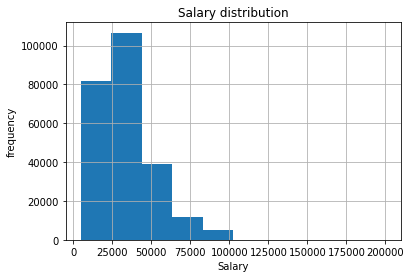

In [23]:
#heavily skewed to the right. 
df['SalaryNormalized'].hist(bins=10)
plt.title('Salary distribution')
plt.xlabel('Salary')
plt.ylabel('frequency');

In [24]:
df['log_avg_salary']=np.log(df['SalaryNormalized'])

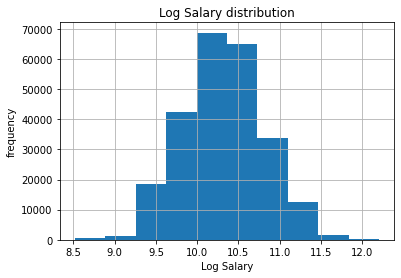

In [25]:
#log the salary to have a normal distribution.
df['log_avg_salary'].hist(bins=10)
plt.title('Log Salary distribution')
plt.xlabel('Log Salary')
plt.ylabel('frequency');

In [26]:
#no of characters in requirement
df['len_requirement']=df['requirements_lem'].apply(lambda x: len(x))

In [27]:
#no of words in requirement
df['words_requirement']=df['requirements_lem'].apply(lambda x: len(word_tokenize(x)))

In [28]:
#using plotly to plot geographical maps

In [29]:
df['LocationNormalized'].unique()

array(['Dorking', 'Glasgow', 'Hampshire', ..., 'Bollington',
       'South Bermonsey', 'Temple'], dtype=object)

In [30]:
import pandas as pd
import os
import json


import folium
from branca.utilities import split_six
state_geo = 'http://geoportal1-ons.opendata.arcgis.com/datasets/01fd6b2d7600446d8af768005992f76a_4.geojson'

m = folium.Map(location=[55, 4], zoom_start=5)
m.choropleth(
    geo_data=state_geo,
    data=df,
    columns=["LocationNormalized", "SalaryNormalized"],
    key_on='feature.properties.nuts118nm',
    fill_color='YlGn',
    fill_opacity=0.2,
    line_opacity=0.7,
    legend_name='Normalized Salary (%)',
    highlight=True
)

m

C:\Users\moonm\anaconda3\envs\capstone\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [31]:
df_state_sorted=df.groupby(by='LocationNormalized').mean().sort_values(by='SalaryNormalized',ascending=False)

In [32]:
df_state_sorted.head(15)

Id  SalaryNormalized  log_avg_salary  \
LocationNormalized                                                   
Worle               6.793716e+07     153600.000000       11.942107   
Denver              6.917692e+07     100000.000000       11.512925   
Berwyn              7.112059e+07     100000.000000       11.512925   
Philadelphia        7.219542e+07      95000.000000       11.461632   
Quebec              7.084621e+07      90000.000000       11.407565   
Reston              6.828131e+07      88750.000000       11.393480   
Northam             7.076426e+07      87600.000000       11.380536   
Dungeness           6.977720e+07      86400.000000       11.366743   
Port Charlotte      6.914818e+07      84500.000000       11.338147   
Dallas              7.072257e+07      82000.000000       11.299648   
Seer Green          7.237381e+07      80000.000000       11.289782   
Sefton              7.237422e+07      75000.000000       11.225243   
Houston             6.896558e+07      74916.666667       11.037902   
Stow Longa          6.862697e+07      73800.000000       11.209114   
West Allington      7.076341e+07      72500.000000       11.161327   

                    len_requirement  words_requirement  
LocationNormalized                                      
Worle                    325.000000          42.000000  
Denver                   451.000000          59.500000  
Berwyn                  1832.000000         217.000000  
Philadelphia            1894.000000         226.000000  
Quebec                  1294.200000         155.600000  
Reston                   622.000000          79.500000  
Northam                  544.000000          76.000000  
Dungeness                459.000000          57.000000  
Port Charlotte          1848.000000         224.500000  
Dallas                   921.400000         113.600000  
Seer Green              1295.000000         168.000000  
Sefton                  1040.000000         142.000000  
Houston                  886.666667         109.333333  
Stow Longa              1421.000000         172.000000  
West Allington           597.000000          84.500000

In [33]:
df_state_sorted['SalaryNormalized'][:15]

LocationNormalized
Worle             153600.000000
Denver            100000.000000
Berwyn            100000.000000
Philadelphia       95000.000000
Quebec             90000.000000
Reston             88750.000000
Northam            87600.000000
Dungeness          86400.000000
Port Charlotte     84500.000000
Dallas             82000.000000
Seer Green         80000.000000
Sefton             75000.000000
Houston            74916.666667
Stow Longa         73800.000000
West Allington     72500.000000
Name: SalaryNormalized, dtype: float64

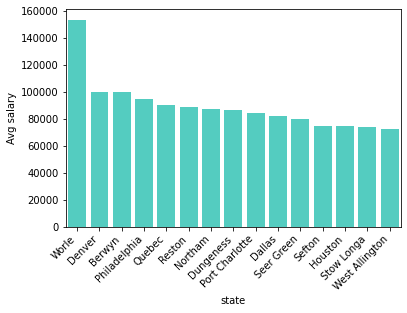

In [34]:
chart=sns.barplot(y=df_state_sorted['SalaryNormalized'][:15],x=df_state_sorted.index[:15],color='turquoise');
plt.xlabel('state')
plt.ylabel('Avg salary');
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

States with highest Normalized salary are Wortle, Denver and Berwyn. We can add this feature into the model later since theres some slight trending.

In [35]:
#quite strong trending for different uk states.

In [36]:
df['Title'].unique()

array(['Engineering Systems Analyst', 'Stress Engineer Glasgow',
       'Modelling and simulation analyst', ...,
       'TEACHER OF BUSINESS STUDIES AND LAW',
       'TEACHER OF BUSINESS STUDIES AND ICT', 'TEACHER OF ENGLISH'],
      dtype=object)

In [37]:
#calling a function to shirten the titles
def short_title(title):
    if 'vice president' in title.lower():
        return 'VP'
    elif 'data scientist' in title.lower():
        return 'DS'
    elif 'data engineer' in title.lower():
        return 'DE'
    elif 'business' in title.lower() and 'analyst' in title.lower():
        return 'BA'
    elif 'analyst' in title.lower():
        return 'DA'
    elif 'software engineer' in title.lower():
        return 'SE'
    elif 'computer scientist' in title.lower():
        return 'CS'
    elif 'material' in title.lower():
        return 'MS'
    elif 'senior' or 'experienced' in title.lower():
        return 'SD'
    elif 'staff' or 'lead' in title.lower():
        return 'LD'
    elif 'principle' in title.lower():
        return 'PDS'
    elif 'machine learning' in title.lower():
        return 'MLE'
    elif 'manager' in title.lower():
        return 'DM'
    elif 'director' in title.lower():
        return 'DD'
    else:
        return 'na'

In [38]:
def job_level(title):
    if 'vice president' in title.lower():
        return 'vp'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'principal' in title.lower():
        return 'principal'
    elif 'staff' in title.lower():
        return 'staff'
    elif 'lead' in title.lower():
        return 'lead'
    elif 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'experienced' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [39]:
df['job_title_simp2']=[job_level(r) for r in df['Title']]

In [40]:
df['job_title_simp2'].unique()

array(['na', 'senior', 'principal', 'lead', 'manager', 'staff',
       'director', 'vp', 'junior'], dtype=object)

In [41]:
df['job_title_simp2'].value_counts()

na           168213
manager       50071
senior        14312
lead           5920
director       2818
staff          2426
principal       972
vp               29
junior            6
Name: job_title_simp2, dtype: int64

In [42]:
df[df['job_title_simp2']=='na'][:15]

Id                                              Title  \
0   12612628                        Engineering Systems Analyst   
1   12612830                            Stress Engineer Glasgow   
2   12612844                   Modelling and simulation analyst   
3   12613049  Engineering Systems Analyst / Mathematical Mod...   
4   12613647         Pioneer, Miser Engineering Systems Analyst   
5   13179816         Engineering Systems Analyst Water Industry   
7   14663196  RECRUITMENT CONSULTANT  INDUSTRIAL / COMMERCIA...   
8   14663197  RECRUITMENT CONSULTANT  CONSTRUCTION / TECHNIC...   
9   15395797                             Subsea Cables Engineer   
10  19047429            Trainee Mortgage Advisor  East Midlands   
11  20199757                   PROJECT ENGINEER, PHARMACEUTICAL   
14  20797143  Chef de Partie  Award Winning Restaurant  Exce...   
15  22579462                                   Quality Engineer   
17  22933091  Chef de Partie  Award Winning Dining  Live In ...   
19  23529949                                C I Design Engineer   

                                      FullDescription  \
0   Engineering Systems Analyst Dorking Surrey Sal...   
1   Stress Engineer Glasgow Salary **** to **** We...   
2   Mathematical Modeller / Simulation Analyst / O...   
3   Engineering Systems Analyst / Mathematical Mod...   
4   Pioneer, Miser  Engineering Systems Analyst Do...   
5   Engineering Systems Analyst Water Industry Loc...   
7   THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...   
8   This is an exceptional opportunity to join a c...   
9   A subsea engineering company is looking for an...   
10  Are you a successful, results driven person? A...   
11  PROJECT ENGINEER PHAMACEUTICAL, c****  Excelle...   
14  A well respected restaurant located in the Der...   
15  Our client are a leading supplier of precision...   
17  A popular hotel located in Norfolk which is a ...   
19  We are currently recruiting on behalf of our c...   

                          LocationRaw LocationNormalized ContractType  \
0             Dorking, Surrey, Surrey            Dorking          NaN   
1         Glasgow, Scotland, Scotland            Glasgow          NaN   
2   Hampshire, South East, South East          Hampshire          NaN   
3      Surrey, South East, South East             Surrey          NaN   
4      Surrey, South East, South East             Surrey          NaN   
5     Dorking, Surrey, Surrey, Surrey            Dorking          NaN   
7      MANCHESTER, Greater Manchester         Manchester          NaN   
8               LEEDS, West Yorkshire              Leeds          NaN   
9                        Aberdeen, UK           Aberdeen          NaN   
10                      East Midlands      East Midlands          NaN   
11                Witney, Oxfordshire             Witney          NaN   
14     Derby Derbyshire East Midlands              Derby          NaN   
15           Gateshead, Tyne and Wear          Gateshead          NaN   
17                Norfolk East Anglia                 UK          NaN   
19       Wolverhampton, West Midlands      Wolverhampton          NaN   

   ContractTime                       Company                     Category  \
0     permanent  Gregory Martin International             Engineering Jobs   
1     permanent  Gregory Martin International             Engineering Jobs   
2     permanent  Gregory Martin International             Engineering Jobs   
3     permanent  Gregory Martin International             Engineering Jobs   
4     permanent  Gregory Martin International             Engineering Jobs   
5     permanent  Gregory Martin International             Engineering Jobs   
7     permanent         Code Blue Recruitment        HR & Recruitment Jobs   
8     permanent         Code Blue Recruitment        HR & Recruitment Jobs   
9     permanent                 Indigo 21 Ltd             Engineering Jobs   
10    permanent             Brite Recruitment    Accounting & Finance Jobs 

In [43]:
df['short_title']=[short_title(r) for r in df['Title']]

In [44]:
df['short_title'].value_counts()

SD    233092
DA      7312
BA      2074
SE      1910
MS       298
DE        38
VP        29
DS        12
CS         2
Name: short_title, dtype: int64

In [45]:
df['short_title'].unique()

array(['DA', 'SD', 'SE', 'BA', 'MS', 'VP', 'DS', 'DE', 'CS'], dtype=object)

In [46]:
df[['Title','short_title']].head(5)

Title short_title
0                        Engineering Systems Analyst          DA
1                            Stress Engineer Glasgow          SD
2                   Modelling and simulation analyst          DA
3  Engineering Systems Analyst / Mathematical Mod...          DA
4         Pioneer, Miser Engineering Systems Analyst          DA

In [47]:
df.describe()

Id  SalaryNormalized  log_avg_salary  len_requirement  \
count  2.447670e+05     244767.000000   244767.000000    244767.000000   
mean   6.970151e+07      34122.543349       10.316797      1141.713536   
std    3.129520e+06      17640.571032        0.491572       642.188869   
min    1.261263e+07       5000.000000        8.517193        25.000000   
25%    6.869551e+07      21500.000000        9.975808       694.000000   
50%    6.993700e+07      30000.000000       10.308953      1040.000000   
75%    7.162606e+07      42500.000000       10.657259      1464.000000   
max    7.270524e+07     200000.000000       12.206073     10421.000000   

       words_requirement  
count      244767.000000  
mean          148.505579  
std            80.932073  
min             4.000000  
25%            92.000000  
50%           136.000000  
75%           190.000000  
max          1252.000000

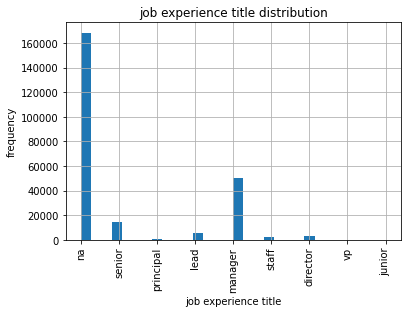

In [48]:
df['job_title_simp2'].hist(bins=30)
plt.title('job experience title distribution')
plt.xlabel('job experience title')
plt.ylabel('frequency')
plt.xticks(rotation=90);

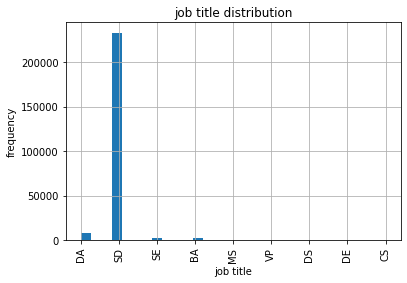

In [49]:
df['short_title'].hist(bins=30)
plt.title('job title distribution')
plt.xlabel('job title')
plt.ylabel('frequency')
plt.xticks(rotation=90);

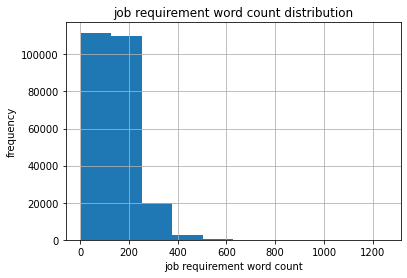

In [50]:
df['words_requirement'].hist(bins=10)
plt.title('job requirement word count distribution')
plt.xlabel('job requirement word count')
plt.ylabel('frequency');

In [51]:
df_senior_sorted=df.groupby(by='job_title_simp2').mean().sort_values(by='SalaryNormalized',ascending=False)

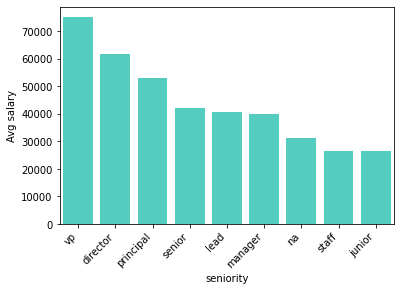

In [52]:
chart=sns.barplot(y=df_senior_sorted['SalaryNormalized'],x=df_senior_sorted.index,color='turquoise');
plt.xlabel('seniority')
plt.ylabel('Avg salary');
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [53]:
df_title_sorted=df.groupby(by='short_title').mean().sort_values(by='SalaryNormalized',ascending=False)

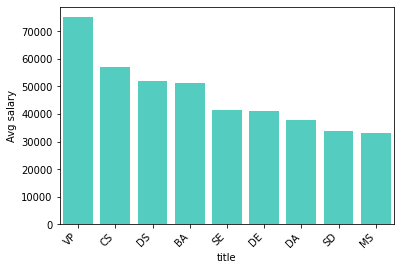

In [54]:
chart=sns.barplot(y=df_title_sorted['SalaryNormalized'],x=df_title_sorted.index,color='turquoise');
plt.xlabel('title')
plt.ylabel('Avg salary');
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [55]:
df.columns

Index(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName', 'requirements_lem', 'log_avg_salary',
       'len_requirement', 'words_requirement', 'job_title_simp2',
       'short_title'],
      dtype='object')

In [56]:
df_category_sorted=df.groupby(by='Category').mean().sort_values(by='SalaryNormalized',ascending=False)

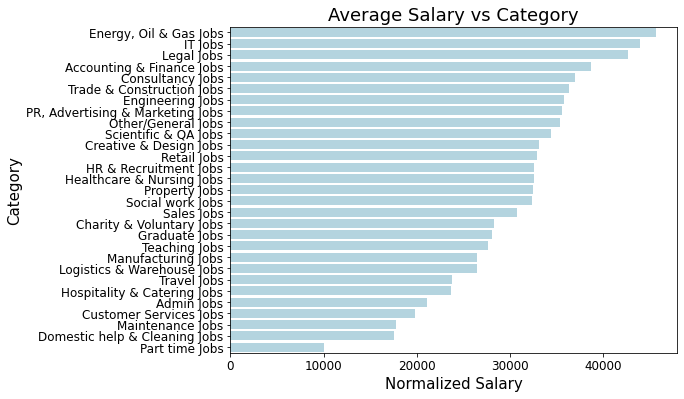

In [57]:
plt.figure(figsize=(8,6))
# make barplot and sort bars
sns.barplot(y=df_category_sorted.index,
        x='SalaryNormalized', 
        data=df_category_sorted,
           color='lightblue')
# set labels
plt.xlabel("Normalized Salary", size=15)
plt.ylabel("Category", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Average Salary vs Category", size=18);

### Using Sweetviz to check feature independence

In [58]:
import plotly
import cufflinks as cf

In [59]:
#makes the chart go offline
cf.go_offline()

In [60]:
%matplotlib inline

In [61]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
job_report = sv.analyze(df)
#display the report
job_report.show_html('Job_visualization.html')

                                             |          | [  0%]   00:00 -> (? left)

C:\Users\moonm\anaconda3\envs\capstone\lib\site-packages\sweetviz\utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\moonm\anaconda3\envs\capstone\lib\site-packages\sweetviz\utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\moonm\anaconda3\envs\capstone\lib\site-packages\sweetviz\utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\moonm\anaconda3\envs\capstone\lib\site-packages\sweetviz\utils.py:34: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\moonm\anaconda3\envs\capstone\lib\site-packages\sweetviz\utils.py:34: FutureWarning:

The series.append method is deprecated and wi

Report Job_visualization.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [62]:
df['SalaryNormalized'].max()

200000

In [63]:
df['SalaryNormalized'].max() - df['SalaryNormalized'].min()

195000

In [64]:
df['SalaryNormalized'].quantile(list(np.linspace(0,1,4)))

0.000000      5000.0
0.333333     24400.0
0.666667     37500.0
1.000000    200000.0
Name: SalaryNormalized, dtype: float64

In [65]:
#Create Bins
BINS = [0,24400,37500,200000]

In [66]:
df['Salary_Bins'] = pd.cut(x=df['SalaryNormalized'], bins=BINS, labels=False)

In [67]:
df['Salary_Bins'].unique()

array([1, 2, 0], dtype=int64)

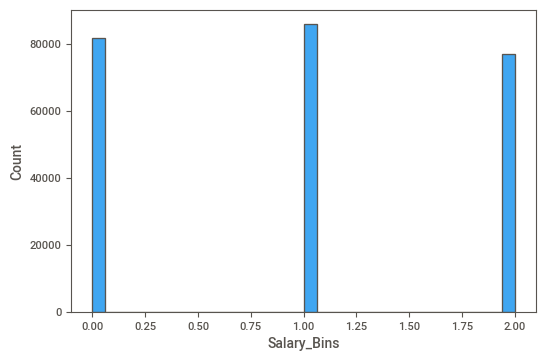

In [68]:
sns.histplot(df['Salary_Bins']);

In [69]:
df['SalaryNormalized'].quantile(list(np.linspace(0,1,3)))

0.0      5000.0
0.5     30000.0
1.0    200000.0
Name: SalaryNormalized, dtype: float64

In [70]:
bins_binary=[0,30000,200000]

In [71]:
df['Salary_Bins_binary'] = pd.cut(x=df['SalaryNormalized'], bins=bins_binary, labels=False)

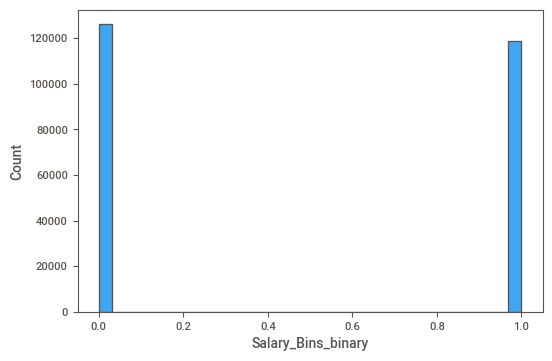

In [72]:
sns.histplot(df['Salary_Bins_binary'],);

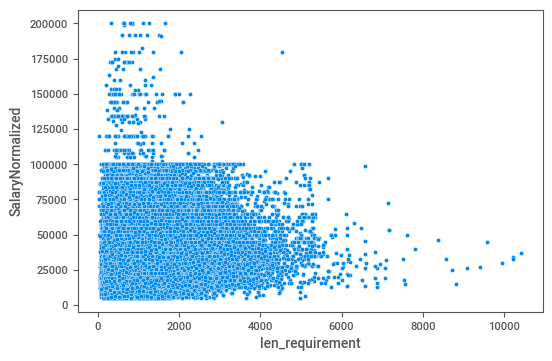

In [73]:
sns.scatterplot(y=df['SalaryNormalized'],x=df['len_requirement']);

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244767 entries, 0 to 244767
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Id                  244767 non-null  int64  
 1   Title               244767 non-null  object 
 2   FullDescription     244767 non-null  object 
 3   LocationRaw         244767 non-null  object 
 4   LocationNormalized  244767 non-null  object 
 5   ContractType        65441 non-null   object 
 6   ContractTime        180863 non-null  object 
 7   Company             212338 non-null  object 
 8   Category            244767 non-null  object 
 9   SalaryRaw           244767 non-null  object 
 10  SalaryNormalized    244767 non-null  int64  
 11  SourceName          244766 non-null  object 
 12  requirements_lem    244767 non-null  object 
 13  log_avg_salary      244767 non-null  float64
 14  len_requirement     244767 non-null  int64  
 15  words_requirement   244767 non-nul

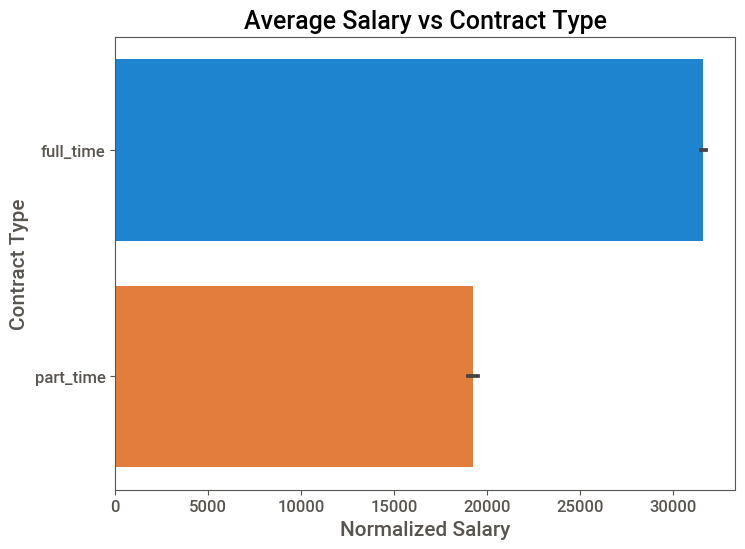

In [75]:
plt.figure(figsize=(8,6))
# make barplot and sort bars
sns.barplot(y='ContractType',
        x='SalaryNormalized', 
        data=df)
# set labels
plt.xlabel("Normalized Salary", size=15)
plt.ylabel("Contract Type", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Average Salary vs Contract Type", size=18);

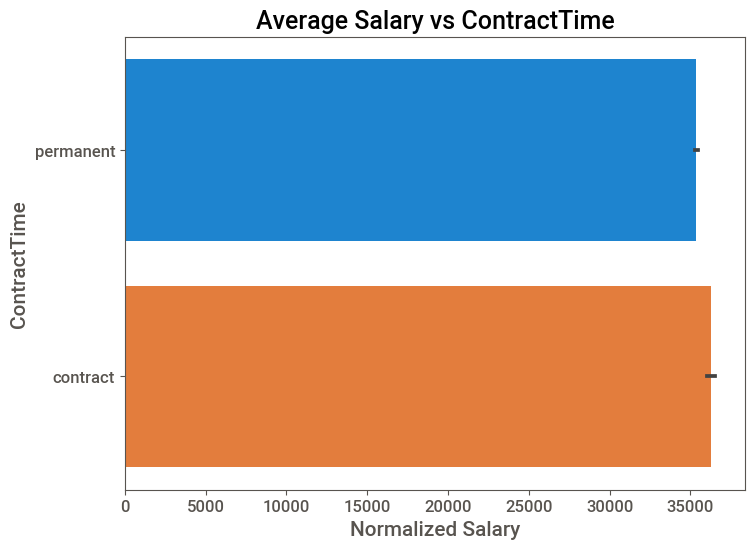

In [76]:
plt.figure(figsize=(8,6))
# make barplot and sort bars
sns.barplot(y='ContractTime',
        x='SalaryNormalized', 
        data=df)
# set labels
plt.xlabel("Normalized Salary", size=15)
plt.ylabel("ContractTime", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Average Salary vs ContractTime", size=18);

In [77]:
df.groupby(by='Company').mean().sort_values(by='SalaryNormalized',ascending=False)[:15]

Id  SalaryNormalized  \
Company                                                             
Medco Services                     7.069906e+07     192000.000000   
Locum Select                       7.249205e+07     192000.000000   
Kingscroft                         7.239354e+07     180000.000000   
Global Medics Locums               6.861411e+07     164800.000000   
Offshore Legal                     7.165210e+07     157500.000000   
Lifetime Training                  6.996114e+07     152640.000000   
Eden Fitness                       7.160124e+07     152640.000000   
Carlyle Associates Limited         7.126721e+07     150000.000000   
Department for Work and Pensions   7.183851e+07     145000.000000   
Ministry of Defence                7.257695e+07     145000.000000   
Randstad Interim Executives        7.018471e+07     144000.000000   
Brightpool Ltd                     7.059345e+07     144000.000000   
Vickers Electronics Limited        7.223460e+07     140000.000000   
Equity FD                          6.919554e+07     140000.000000   
CES Locums                         6.898780e+07     135970.909091   

                                   log_avg_salary  len_requirement  \
Company                                                              
Medco Services                          12.165251       609.000000   
Locum Select                            12.165251       922.000000   
Kingscroft                              12.100712      2056.000000   
Global Medics Locums                    12.011103       336.166667   
Offshore Legal                          11.924320       619.000000   
Lifetime Training                       11.935837       999.000000   
Eden Fitness                            11.935837       925.000000   
Carlyle Associates Limited              11.918391      2030.000000   
Department for Work and Pensions        11.884489      1564.000000   
Ministry of Defence                     11.884489      1497.000000   
Randstad Interim Executives             11.874084       988.000000   
Brightpool Ltd                          11.877569       621.500000   
Vickers Electronics Limited             11.849398       949.000000   
Equity FD                               11.846840       859.500000   
CES Locums                              11.819245       465.727273   

                                   words_requirement  Salary_Bins  \
Company                                                             
Medco Services                             89.000000          2.0   
Locum Select                              121.000000          2.0   
Kingscroft                                255.000000          2.0   
Global Medics Locums                       45.833333          2.0   
Offshore Legal                             85.000000          2.0   
Lifetime Training                         144.000000          2.0   
Eden Fitness                              126.000000          2.0   
Carlyle Associates Limited                249.666667          2.0   
Department for Work and Pensions          196.000000          2.0   
Ministry of Defence                       189.000000          2.0   
Randstad Interim Executives               123.500000          2.0   
Brightpool Ltd                             79.500000          2.0   
Vickers Electronics Limited               136.000000          2.0   
Equity FD                                 110.500000          2.0   
CES Locums                                 65.818182          2.0   

                                   Salary_Bins_binary  
Company                                                
Medco Services                                    1.0  
Locum Select                                      1.0  
Kingscroft                                        1.0  
Global Medics Locums                              1.0  
Offshore Legal                                    1.0  
Lifetime Training                                 1.0  
Eden Fitness                                      1.0  
Ca

In [78]:
df_company_sorted=df.groupby(by='Company').mean().sort_values(by='SalaryNormalized',ascending=False)

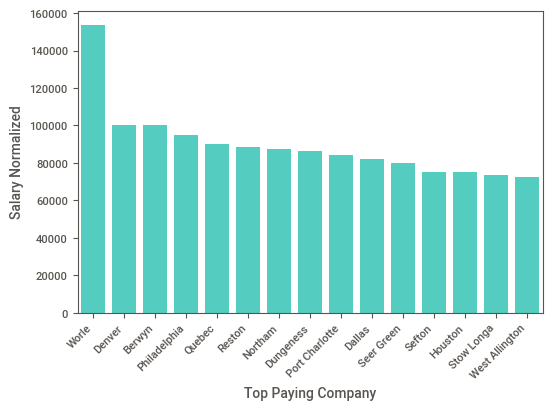

In [79]:
chart=sns.barplot(y=df_state_sorted['SalaryNormalized'][:15],x=df_state_sorted.index[:15],color='turquoise');
plt.xlabel('Top Paying Company')
plt.ylabel('Salary Normalized');
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [80]:
df_title_sorted

Id  SalaryNormalized  log_avg_salary  len_requirement  \
short_title                                                                    
VP           6.973343e+07      75123.206897       11.192977      1607.482759   
CS           7.122344e+07      57000.000000       10.839148      1206.500000   
DS           7.064518e+07      52083.333333       10.813049      1753.166667   
BA           6.993603e+07      51067.175024       10.772522      1323.854870   
SE           6.962999e+07      41578.350262       10.590437      1195.002618   
DE           6.982502e+07      40889.473684       10.499761      1146.394737   
DA           6.978662e+07      37948.062363       10.462314      1247.527489   
SD           6.969683e+07      33784.566961       10.305755      1136.013188   
MS           7.003160e+07      33170.171141       10.325651      1323.922819   

             words_requirement  
short_title                     
VP                  200.172414  
CS                  152.000000  
DS                  240.166667  
BA                  165.811475  
SE                  154.882723  
DE                  154.289474  
DA                  159.378693  
SD                  147.925278  
MS                  164.818792

In [81]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [82]:
fig = Figure(figsize=(18,18))
axis = fig.add_subplot(2,1,1)
axis.bar(height=df_title_sorted['SalaryNormalized'],x=df_title_sorted.index,color='turquoise')
axis.set(title='job title vs salary in the UK', ylabel='Salary', xlabel='Job title')
axis.set_xticklabels(df_title_sorted.index, rotation=90)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


axis.bar(height=df_company_sorted['SalaryNormalized'][:15],x=df_company_sorted.index[:15],color='turquoise')
axis.set(title='job title vs salary in the UK', ylabel='Salary', xlabel='Job title')
axis.set_xticklabels(df_company_sorted.index, rotation=90)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

C:\Users\moonm\AppData\Local\Temp\ipykernel_13712\2090263958.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\moonm\AppData\Local\Temp\ipykernel_13712\2090263958.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



In [83]:
#export all the df for app use.
df_senior_sorted.to_csv('data/df_senior_salary.csv')
df_state_sorted.to_csv('data/df_state_salary.csv')
df_title_sorted.to_csv('data/df_title_salary.csv')
df_company_sorted.to_csv('data/df_company_salary.csv')
df_category_sorted.to_csv('data/df_category_sorted.csv')

In [84]:
df.dtypes

Id                      int64
Title                  object
FullDescription        object
LocationRaw            object
LocationNormalized     object
ContractType           object
ContractTime           object
Company                object
Category               object
SalaryRaw              object
SalaryNormalized        int64
SourceName             object
requirements_lem       object
log_avg_salary        float64
len_requirement         int64
words_requirement       int64
job_title_simp2        object
short_title            object
Salary_Bins             int64
Salary_Bins_binary      int64
dtype: object

In [85]:
df['ContractType'].unique()

array([nan, 'full_time', 'part_time'], dtype=object)

In [86]:
df.columns

Index(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName', 'requirements_lem', 'log_avg_salary',
       'len_requirement', 'words_requirement', 'job_title_simp2',
       'short_title', 'Salary_Bins', 'Salary_Bins_binary'],
      dtype='object')

## One hot encoding and ordinal encoding for nominal and ordinal features

In [87]:
ordinal_col=['job_title_simp2', 'short_title','Category', 'LocationNormalized','ContractType']
numerical_col=['LocationNormalized','ContractType','log_avg_salary','len_requirement','words_requirement','Salary_Bins']

In [88]:
df['ContractType'].fillna(value='unknown',inplace=True)

In [89]:
df['short_title'].unique()

array(['DA', 'SD', 'SE', 'BA', 'MS', 'VP', 'DS', 'DE', 'CS'], dtype=object)

In [90]:
df['job_title_simp2'].unique()

array(['na', 'senior', 'principal', 'lead', 'manager', 'staff',
       'director', 'vp', 'junior'], dtype=object)

In [91]:
df.dtypes

Id                      int64
Title                  object
FullDescription        object
LocationRaw            object
LocationNormalized     object
ContractType           object
ContractTime           object
Company                object
Category               object
SalaryRaw              object
SalaryNormalized        int64
SourceName             object
requirements_lem       object
log_avg_salary        float64
len_requirement         int64
words_requirement       int64
job_title_simp2        object
short_title            object
Salary_Bins             int64
Salary_Bins_binary      int64
dtype: object

In [109]:
#ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define ordinal encoding
ec = OrdinalEncoder()
# transform data
ordinal_data = ec.fit_transform(df[ordinal_col])
ordinal_df=pd.DataFrame(ordinal_data,columns=ordinal_col)

In [110]:
pd.set_option('display.max_rows', None)

In [111]:
df.reset_index(inplace=True,drop=True)

In [113]:
df[ordinal_col][:5]

job_title_simp2 short_title          Category LocationNormalized  \
0              na          DA  Engineering Jobs            Dorking   
1              na          SD  Engineering Jobs            Glasgow   
2              na          DA  Engineering Jobs          Hampshire   
3              na          DA  Engineering Jobs             Surrey   
4              na          DA  Engineering Jobs             Surrey   

  ContractType  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown

In [116]:
numerical_df=df[numerical_col]

In [117]:
ordinal_df[:5]

job_title_simp2  short_title  Category  LocationNormalized  ContractType
0              4.0          2.0       8.0               750.0           2.0
1              4.0          6.0       8.0               986.0           2.0
2              4.0          2.0       8.0              1068.0           2.0
3              4.0          2.0       8.0              2309.0           2.0
4              4.0          2.0       8.0              2309.0           2.0

In [118]:
df.columns

Index(['Id', 'Title', 'FullDescription', 'LocationRaw', 'LocationNormalized',
       'ContractType', 'ContractTime', 'Company', 'Category', 'SalaryRaw',
       'SalaryNormalized', 'SourceName', 'requirements_lem', 'log_avg_salary',
       'len_requirement', 'words_requirement', 'job_title_simp2',
       'short_title', 'Salary_Bins', 'Salary_Bins_binary'],
      dtype='object')

In [119]:
ordinal_df.columns

Index(['job_title_simp2', 'short_title', 'Category', 'LocationNormalized',
       'ContractType'],
      dtype='object')

In [120]:
job_d=pd.concat([numerical_df,ordinal_df,df['requirements_lem'],df['Salary_Bins_binary']],sort=False,axis=1)

In [ ]:
job_d.head()

In [ ]:
#save to csv
job_d.to_csv(r'data\job_data_cleaned.csv',index=False)

In [ ]:
heatmap_df=job_d

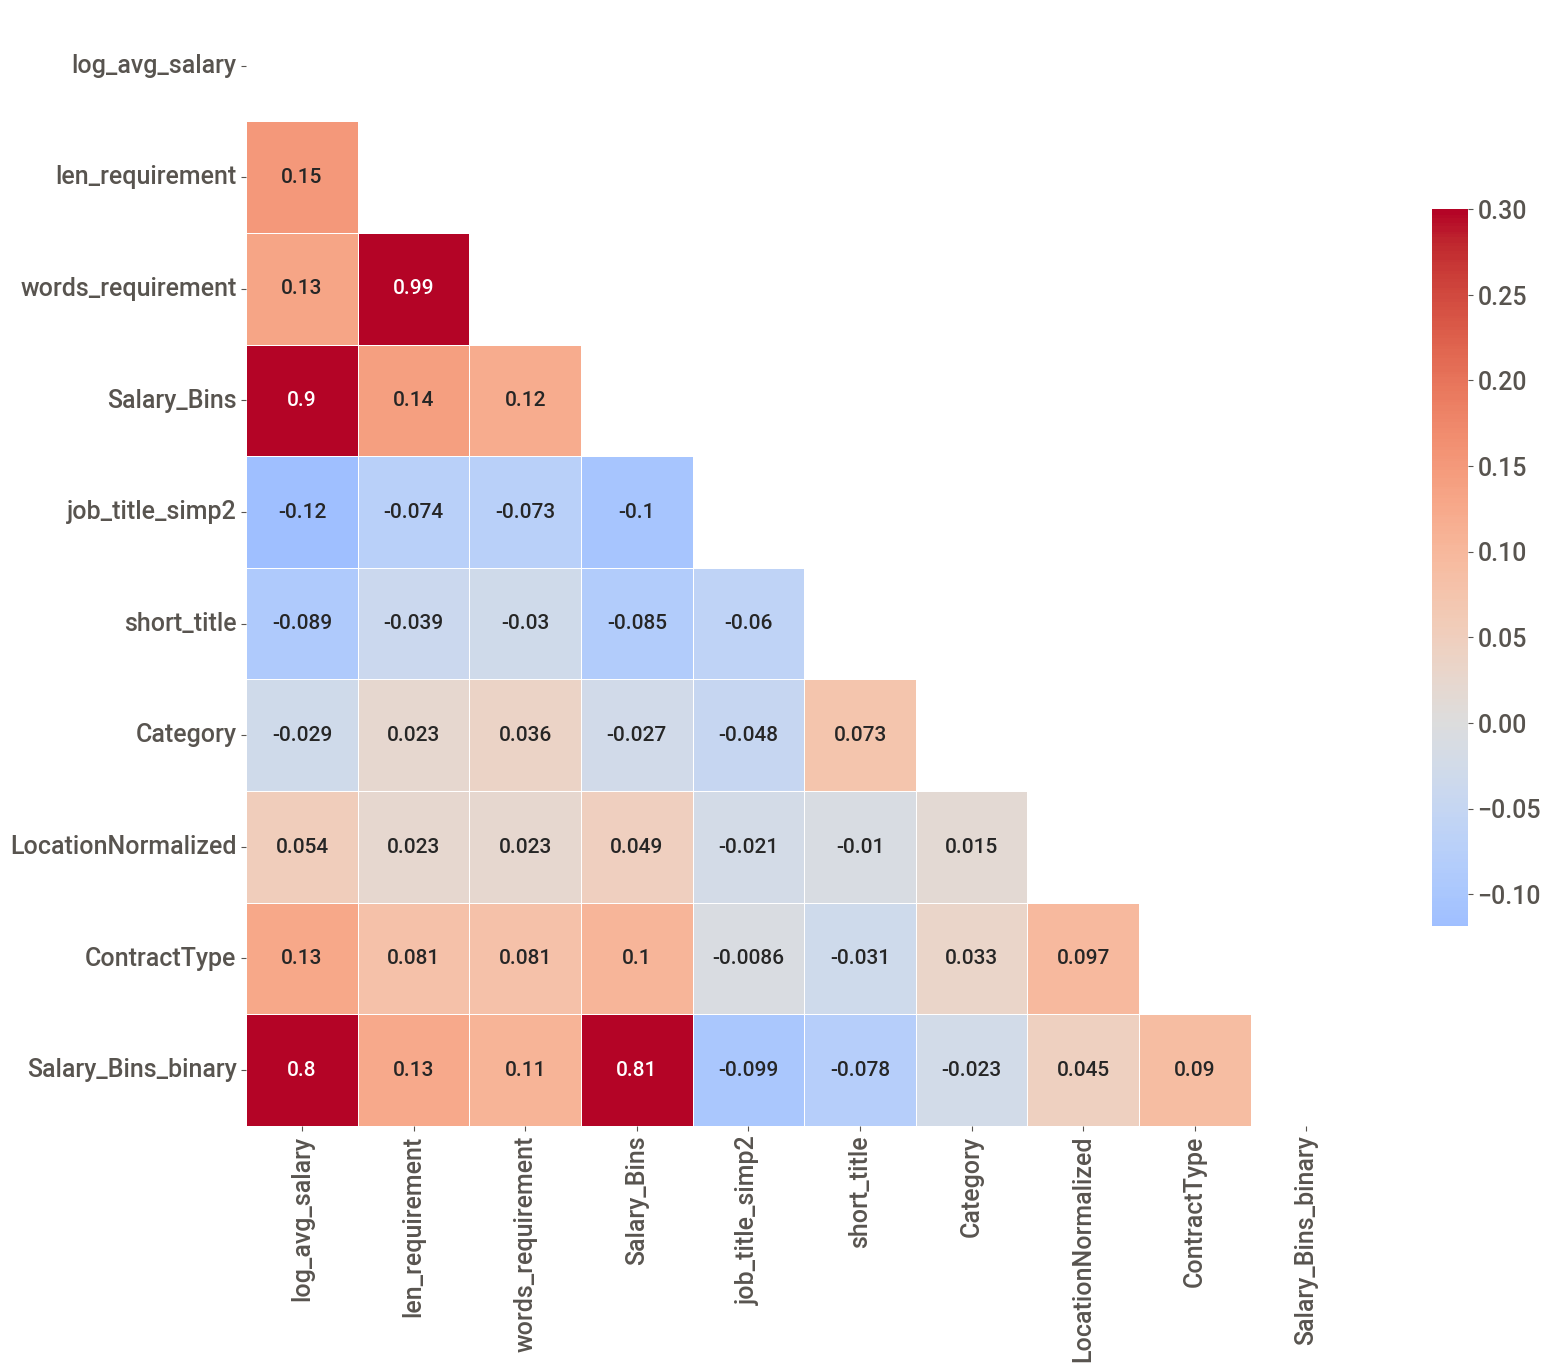

In [149]:
plt.figure(figsize= (18,19))
with plt.style.context({'axes.labelsize':24,
                        'xtick.labelsize':18,
                        'ytick.labelsize':18}):
    mask = np.zeros_like(heatmap_df.corr())
    mask[np.triu_indices_from(mask)] = True
    Corr_map = sns.diverging_palette(200, 30, as_cmap=True)
    sns.heatmap(heatmap_df.corr(),vmax=.3, center=0, cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},mask=mask,annot=True,annot_kws={'size':15});

In [129]:
heatmap_df.corr()['log_avg_salary'].sort_values(ascending=False)

log_avg_salary        1.000000
Salary_Bins           0.901091
Salary_Bins_binary    0.804813
len_requirement       0.152109
words_requirement     0.132190
ContractType          0.128080
LocationNormalized    0.053870
Category             -0.029458
short_title          -0.089129
job_title_simp2      -0.118815
Name: log_avg_salary, dtype: float64

# Wordcloud

In [132]:
#the dataset is too huge which crashes the wordcloud plotter. Lets take a sample instead using dask.
import dask.dataframe as dd
#data set is too huge which causes memory error. need to do sampling test
# using a function so we can track memory usage
def dask_read_and_sample(df_train,blocksize, sample_size):
    
    # let us stratify to get the same number of rows for frauds and non-frauds
    sample_2 = df_train.query('Salary_Bins == 2').sample(frac=sample_size)
    sample_1 = df_train.query('Salary_Bins == 1').sample(frac=sample_size)
    sample_0 = df_train.query('Salary_Bins == 0').sample(frac=sample_size)
    
    # concatenate the dataframe
    df_sampled = dd.concat([sample_2, sample_1, sample_0])
    
    return df_sampled.compute(scheduler='synchronous')

# executing
df_train = dask_read_and_sample(df,blocksize=10e10, sample_size=0.005)

In [135]:
df_train.shape

(1224, 20)

In [133]:
#import io
import base64

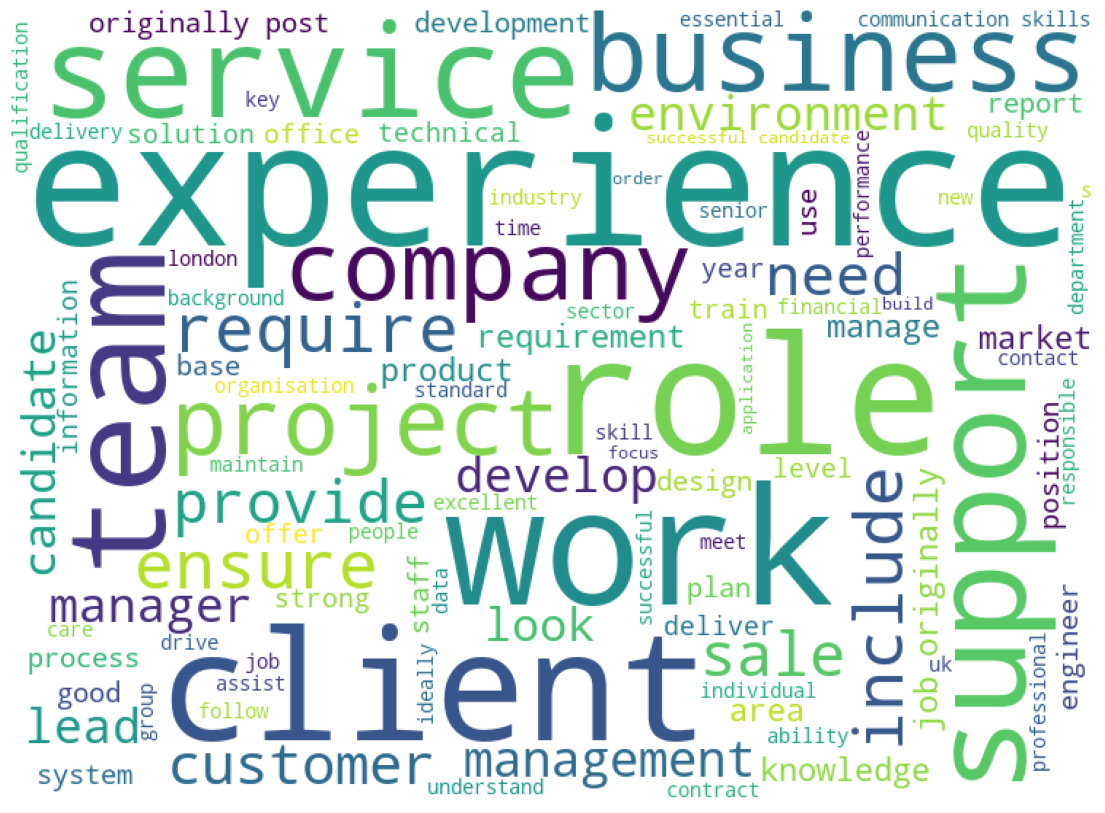

In [134]:
text = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for x in df_train.requirements_lem: 
      
    # typecaste each val to string 
    x = str(x) 
  
    # split the value 
    values = x.split() 
      
    # Converts each token into lowercase 
    for i in range(len(values)): 
        values[i] = values[i].lower() 
          
    for words in values: 
        text = text + words + ' '
  
  
wc = WordCloud(max_words= 100,
                      width = 744, 
                      height = 544,
                      background_color ='white',
                      stopwords=stopwords, 
                      contour_width=3, 
                      contour_color='purple',
                      min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (14, 14)) 
plt.imshow(wc) 
plt.axis("off")
plt.savefig('resources/cloud.png')

In [137]:
df_train[df_train.requirements_lem.str.contains('experience')]['requirements_lem'][:5]

528      Quality Manager Nursing Homes Scotland k annu...
1993     Qualified Social Worker Children Families Sou...
2774     Registered General Nurses Band work Hospitals...
3619     Social Worker Looked After Children Gwent An ...
3647     An excellent opportunity exist experience Ana...
Name: requirements_lem, dtype: object

# Exploring N-grams

In [140]:
# Create function to get top words
def plot_top_words(df, col, n, n_gram_range, title, palette='tab10'):
    def get_top_n_words(corpus, n=n, k=n_gram_range):     
        vec = CountVectorizer(ngram_range=(k,k), stop_words='english').fit(corpus)     
        bag_of_words = vec.transform(corpus)     
        sum_words = bag_of_words.sum(axis=0)      
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]    
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
        return words_freq[:n]
    temp_df = pd.DataFrame(data=get_top_n_words(df[col], n), columns=['word','freq'])
    plt.figure(figsize=(10,6))
    sns.barplot(data=temp_df, y='word', x='freq',palette='Blues_d')
    plt.ylabel('')
    plt.xlabel('')
    plt.title(title, fontsize=18)

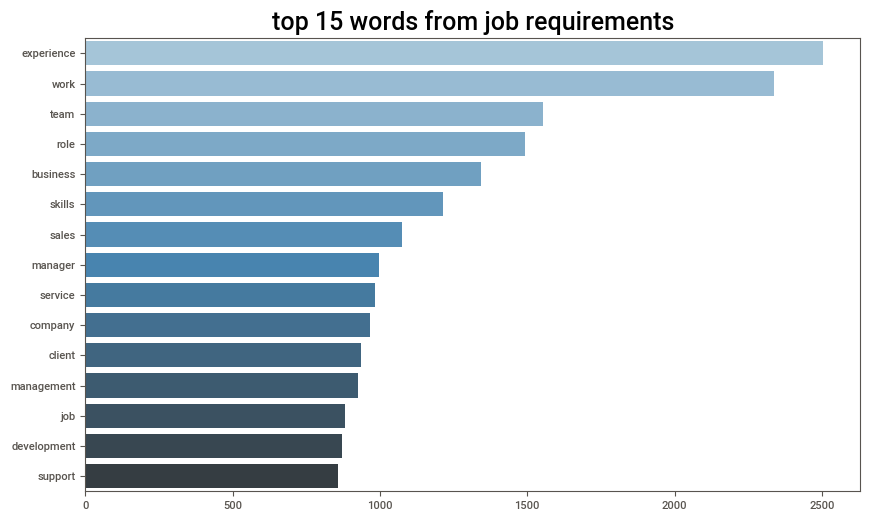

In [141]:
plot_top_words(df_train,'requirements_lem',15,1,'top 15 words from job requirements')

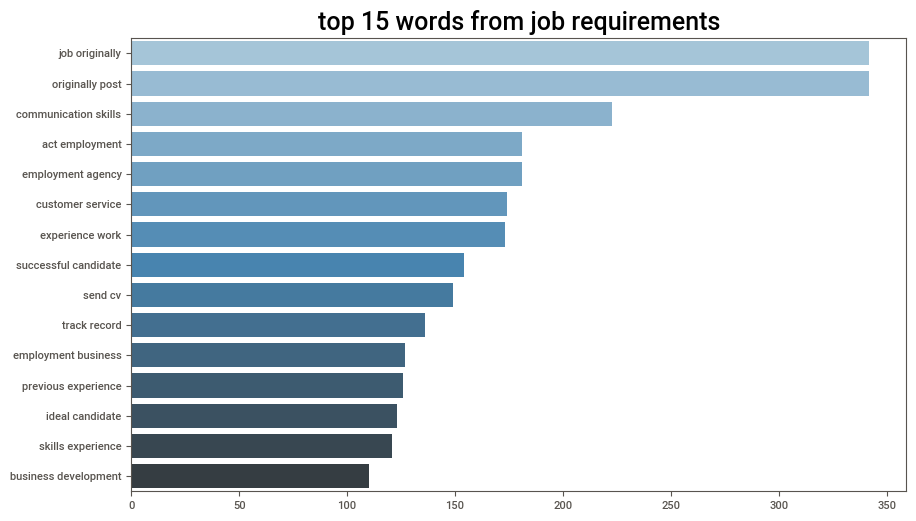

In [142]:
plot_top_words(df_train,'requirements_lem',15,2,'top 15 words from job requirements')

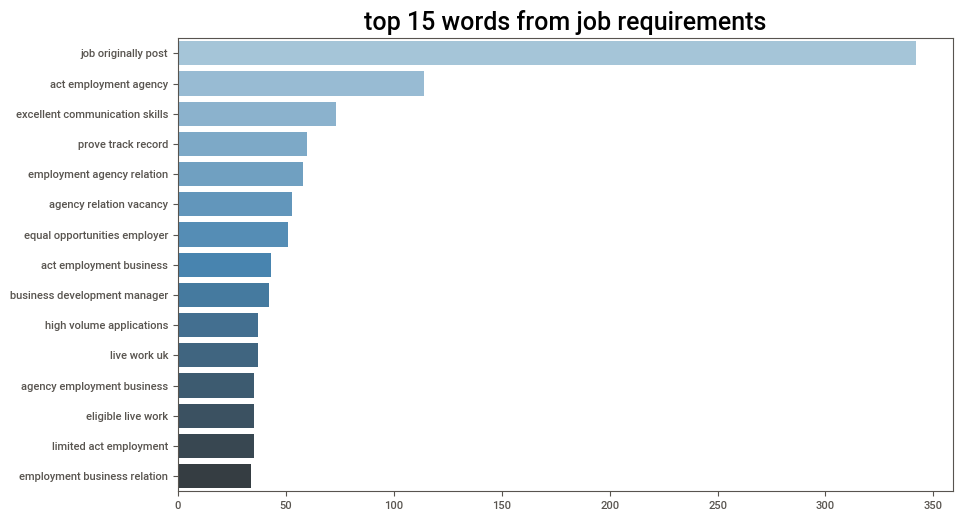

In [143]:
plot_top_words(df_train,'requirements_lem',15,3,'top 15 words from job requirements')